In [2]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.9 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 81.9 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


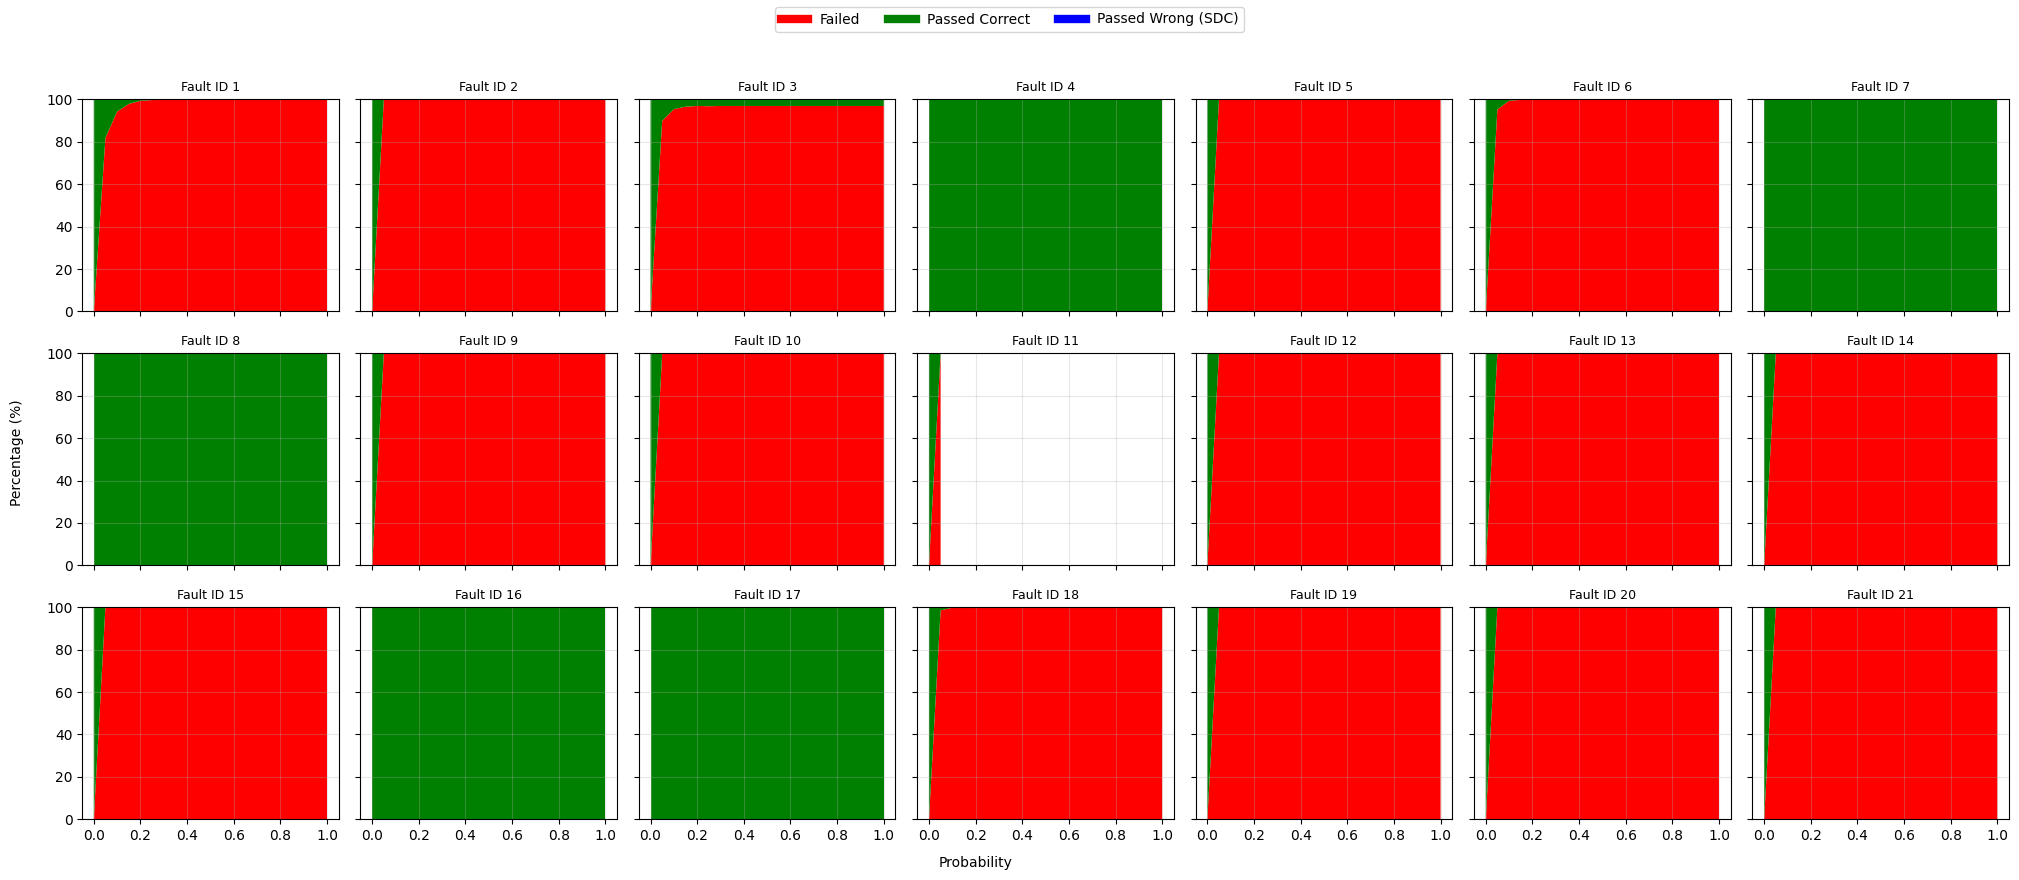

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("results_0-0.05-1.csv")

# Columns to plot
cols = ["failed", "passed_correct", "passed_wrong_sdc"]
colors = {
    "failed": "red",
    "passed_correct": "green",
    "passed_wrong_sdc": "blue",
}

# Convert counts to percentages
df["total"] = df[cols].sum(axis=1)
for c in cols:
    df[c + "_pct"] = 100 * df[c] / df["total"]

# Unique fault IDs
fault_ids = sorted(df["fault_id"].unique())

# Create subplot grid: 3 rows x 7 columns
fig, axes = plt.subplots(3, 7, figsize=(21, 9), sharex=True, sharey=True)
axes = axes.flatten()

for ax, fid in zip(axes, fault_ids):
    sub = df[df["fault_id"] == fid].sort_values("probability")

    ax.stackplot(
        sub["probability"],
        sub["failed_pct"],
        sub["passed_correct_pct"],
        sub["passed_wrong_sdc_pct"],
        colors=[colors[c] for c in cols],
        labels=cols,
    )

    ax.set_title(f"Fault ID {fid}", fontsize=9)
    ax.set_ylim(0, 100)
    ax.grid(alpha=0.3)

# Remove unused axes if fewer than 21
for ax in axes[len(fault_ids):]:
    ax.axis("off")

# Global labels
fig.text(0.5, 0.04, "Probability", ha="center")
fig.text(0.04, 0.5, "Percentage (%)", va="center", rotation="vertical")

# One legend for the whole figure
handles = [
    plt.Line2D([0], [0], color=colors[c], lw=6) for c in cols
]
fig.legend(
    handles,
    ["Failed", "Passed Correct", "Passed Wrong (SDC)"],
    loc="upper center",
    ncol=3,
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.93])
plt.show()


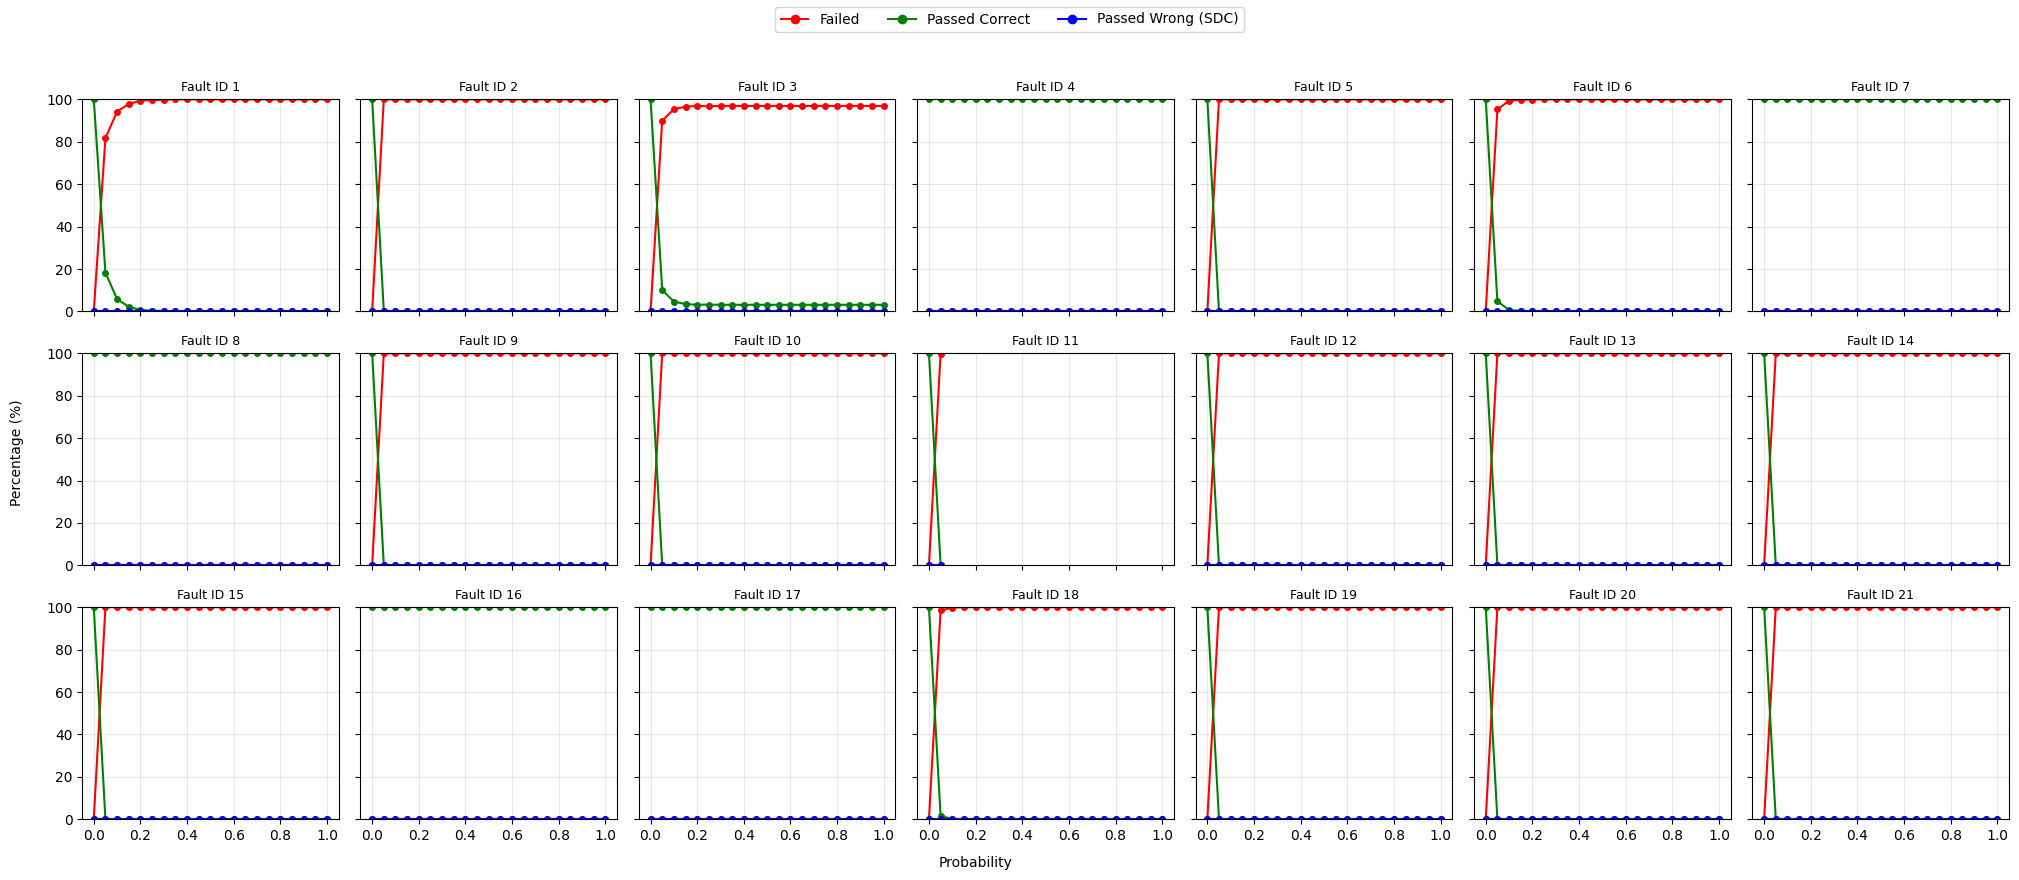

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("results_0-0.05-1.csv")

cols = ["failed", "passed_correct", "passed_wrong_sdc"]
colors = {
    "failed": "red",
    "passed_correct": "green",
    "passed_wrong_sdc": "blue",
}

# Convert to percentages
df["total"] = df[cols].sum(axis=1)
for c in cols:
    df[c + "_pct"] = 100 * df[c] / df["total"]

fault_ids = sorted(df["fault_id"].unique())

# 3x7 grid
fig, axes = plt.subplots(3, 7, figsize=(21, 9), sharex=True, sharey=True)
axes = axes.flatten()

for ax, fid in zip(axes, fault_ids):
    sub = df[df["fault_id"] == fid].sort_values("probability")

    for c in cols:
        ax.plot(
            sub["probability"],
            sub[c + "_pct"],
            marker="o",
            linestyle="-",
            color=colors[c],
            linewidth=1.5,
            markersize=4,
        )

    ax.set_title(f"Fault ID {fid}", fontsize=9)
    ax.set_ylim(0, 100)
    ax.grid(alpha=0.3)

# Hide unused axes (safety)
for ax in axes[len(fault_ids):]:
    ax.axis("off")

# Global labels
fig.text(0.5, 0.04, "Probability", ha="center")
fig.text(0.04, 0.5, "Percentage (%)", va="center", rotation="vertical")

# One legend for all subplots
handles = [
    plt.Line2D([0], [0], color=colors[c], marker="o", lw=1.5)
    for c in cols
]
fig.legend(
    handles,
    ["Failed", "Passed Correct", "Passed Wrong (SDC)"],
    loc="upper center",
    ncol=3,
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.93])
plt.show()
